# Pre-Processing FX Risk Premia Data

In [1]:
import pandas as pd
import numpy as np

# 1. Carry Returns Data

In [2]:
crs = pd.read_excel('FX Risk Premia Data.xlsx', 'CR', index_col=0, header=3).iloc[3:]
crs.sort_index(inplace=True)
crs = crs.astype(float)
crs.columns = ['EURUSD', 'GBPUSD', 'USDJPY', 'AUDUSD', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDNOK', 'USDSEK']

crs.head(2)

,EURUSD,GBPUSD,USDJPY,AUDUSD,NZDUSD,USDCAD,USDCHF,USDNOK,USDSEK
2000-01-03 00:00:00,84.7247,98.6827,93.9995,107.4905,98.5725,94.6431,118.6139,102.6109,105.3244
2000-01-04 00:00:00,85.1545,98.6710,95.6610,106.9175,97.5191,95.0386,117.8988,103.3723,105.3880


In [3]:
rs = crs.apply(np.log).diff(1).fillna(0)
rs.index = pd.to_datetime(rs.index)

rs.head(2)

,EURUSD,GBPUSD,USDJPY,AUDUSD,NZDUSD,USDCAD,USDCHF,USDNOK,USDSEK
2000-01-03,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
2000-01-04,0.00506,-0.000119,0.017521,-0.005345,-0.010744,0.00417,-0.006047,0.007393,0.000604


In [4]:
rs.to_csv('g10_daily_carry_rs_2000_2019.csv')

# 2. Returns Data

<font color=red> Make sure that the timing lines up

In [5]:
data_ohlc = pd.read_excel('FX Risk Premia Data.xlsx', 'OHLC', index_col=0, header=[3,5]).unstack()

In [6]:
prices = data_ohlc.loc[:, 'PX_OPEN'].unstack().T
prices.index = pd.to_datetime(prices.index)
prices.sort_index(inplace=True)
prices = prices.astype(float)
prices.columns = ['AUDUSD', 'USDCAD', 'USDCHF', 'EURUSD', 'GBPUSD', 'USDJPY', 'USDNOK', 'NZDUSD', 'USDSEK']
prices = prices[rs.columns]

open_rs = prices.reindex(rs.index).apply(np.log).diff(1).fillna(0)

open_rs.to_csv('g10_daily_open_rs_2000_2019.csv')

open_rs.head(2)

,EURUSD,GBPUSD,USDJPY,AUDUSD,NZDUSD,USDCAD,USDCHF,USDNOK,USDSEK
2000-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2000-01-04,0.016834,0.012983,-0.004317,0.003194,0.000762,0.0,-0.016642,-0.011283,-0.013458


In [7]:
prices = data_ohlc.loc[:, 'PX_LOW'].unstack().T
prices.index = pd.to_datetime(prices.index)
prices.sort_index(inplace=True)
prices = prices.astype(float)
prices.columns = ['AUDUSD', 'USDCAD', 'USDCHF', 'EURUSD', 'GBPUSD', 'USDJPY', 'USDNOK', 'NZDUSD', 'USDSEK']
prices = prices[rs.columns]

low_rs = prices.reindex(rs.index).apply(np.log).diff(1).fillna(0)

low_rs.to_csv('g10_daily_low_rs_2000_2019.csv')

low_rs.head(2)

,EURUSD,GBPUSD,USDJPY,AUDUSD,NZDUSD,USDCAD,USDCHF,USDNOK,USDSEK
2000-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2000-01-04,0.016281,0.010536,0.000592,-0.002748,-0.003461,0.002841,-0.006166,-0.001511,-0.001953


In [8]:
prices = data_ohlc.loc[:, 'PX_HIGH'].unstack().T
prices.index = pd.to_datetime(prices.index)
prices.sort_index(inplace=True)
prices = prices.astype(float)
prices.columns = ['AUDUSD', 'USDCAD', 'USDCHF', 'EURUSD', 'GBPUSD', 'USDJPY', 'USDNOK', 'NZDUSD', 'USDSEK']
prices = prices[rs.columns]

high_rs = prices.reindex(rs.index).apply(np.log).diff(1).fillna(0)

high_rs.to_csv('g10_daily_high_rs_2000_2019.csv')

high_rs.head(2)

,EURUSD,GBPUSD,USDJPY,AUDUSD,NZDUSD,USDCAD,USDCHF,USDNOK,USDSEK
2000-01-03,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000
2000-01-04,0.00543,0.001036,0.010999,-0.002877,-0.001707,0.00503,-0.017809,-0.00568,-0.011837


In [9]:
prices = data_ohlc.loc[:, 'PX_LAST'].unstack().T
prices.index = pd.to_datetime(prices.index)
prices.sort_index(inplace=True)
prices = prices.astype(float)
prices.columns = ['AUDUSD', 'USDCAD', 'USDCHF', 'EURUSD', 'GBPUSD', 'USDJPY', 'USDNOK', 'NZDUSD', 'USDSEK']
prices = prices[rs.columns]

last_rs = prices.reindex(rs.index).apply(np.log).diff(1).fillna(0)

last_rs.to_csv('g10_daily_last_rs_2000_2019.csv')

last_rs.head(2)

,EURUSD,GBPUSD,USDJPY,AUDUSD,NZDUSD,USDCAD,USDCHF,USDNOK,USDSEK
2000-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2000-01-04,0.005161,-0.000122,0.017297,-0.005329,-0.010724,0.004139,-0.006209,0.007389,0.000513


# 3. Graph Data


<font color=red> Check if carry graph has been constructed properly

In [10]:
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import networkx as nx

In [11]:
forwards = pd.read_excel('FX Risk Premia Data.xlsx', '1MF', index_col=0, header=3).iloc[3:]
forwards.sort_index(inplace=True)
forwards = forwards.astype(float)
forwards.columns = ['EURUSD', 'GBPUSD', 'USDJPY', 'AUDUSD', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDNOK', 'USDSEK']

# Adjust implied forward points
forwards['USDJPY']*=100

forwards.head(2)

,EURUSD,GBPUSD,USDJPY,AUDUSD,NZDUSD,USDCAD,USDCHF,USDNOK,USDSEK
2000-01-03 00:00:00,23.85,2.55,-5140.0,2.95,3.15,-11.50,-61.4,-10.0,-180.5
2000-01-04 00:00:00,23.15,1.75,-5010.0,3.13,3.05,-11.13,-60.5,-28.5,-172.5


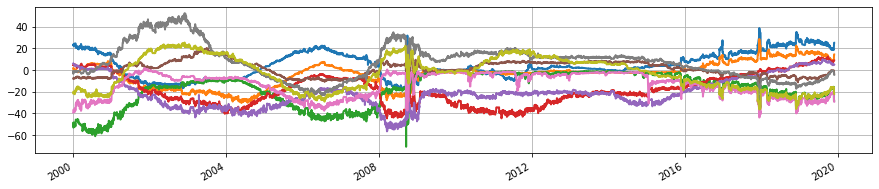

In [12]:
carry_score = (forwards/prices).ffill()
carry_score.plot(figsize=(15,3), legend=0, linewidth=2, grid=True)

In [13]:
def pairwise_carry_score (cs1, cs2, scaling=10):
    return np.exp(np.mean(cs1-cs2)/scaling)

In [14]:
A = pd.DataFrame(data=pairwise_distances(carry_score.T, metric=pairwise_carry_score),
                 index=rs.columns,
                 columns=rs.columns)

A = A.replace(1,0)

A = A.T

# A[A<0.3] = 0

D_vals = A.sum(1)

A = pd.DataFrame(data=np.diag(1/D_vals**0.5).dot(A).dot(np.diag(1/D_vals**0.5)),
                 index=A.index,
                 columns=A.columns).replace([np.nan, np.inf], 0)

A.to_csv('g10_daily_carry_adjacency_matrix_2000_2019.csv')

A

,EURUSD,GBPUSD,USDJPY,AUDUSD,NZDUSD,USDCAD,USDCHF,USDNOK,USDSEK
EURUSD,0.000000,0.077482,0.010058,0.008530,0.005465,0.169503,0.017521,0.485188,0.089683
GBPUSD,0.405805,0.000000,0.014110,0.011967,0.007667,0.237788,0.024579,0.680649,0.125813
USDJPY,0.761325,0.203923,0.000000,0.022451,0.014384,0.446111,0.046112,1.276956,0.236035
AUDUSD,0.802837,0.215042,0.027915,0.000000,0.015168,0.470435,0.048626,1.346583,0.248906
NZDUSD,0.927552,0.248448,0.032251,0.027353,0.000000,0.543514,0.056180,1.555766,0.287571
USDCAD,0.328120,0.087888,0.011409,0.009676,0.006199,0.000000,0.019874,0.550350,0.101728
USDCHF,0.637725,0.170816,0.022174,0.018806,0.012048,0.373685,0.000000,1.069643,0.197715
USDNOK,0.262027,0.070185,0.009111,0.007727,0.004950,0.153539,0.015870,0.000000,0.081237
USDSEK,0.389280,0.104270,0.013535,0.011480,0.007355,0.228105,0.023578,0.652933,0.000000


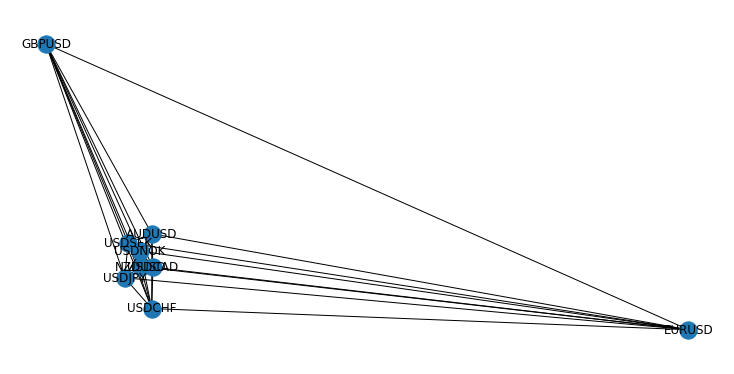

In [15]:
G = nx.from_pandas_adjacency(A)
plt.figure(figsize=(10,5))
nx.draw_kamada_kawai(G, with_labels=True)

In [20]:
# Adjacency matrix as a constant variable (N x N)
lbw = 22
damping_constant = 0.9
A_t = np.zeros((lbw, lbw))
for row_idx in range(A_t.shape[0]):
    for col_idx in range(A_t.shape[1]):
        if col_idx > row_idx:
            A_t[row_idx, col_idx] = damping_constant**(col_idx-row_idx)

A_t = A_t.T
A_t = pd.DataFrame(A_t)

A_t.to_csv('A_t_22.csv')

A_t.head(3)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.81,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
